Goal : Predict rain sum (mm)

# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [18]:
train_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318192 entries, 0 to 318191
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                318192 non-null  object 
 1   temperature_2m (°C)                 318022 non-null  float64
 2   relativehumidity_2m (%)             318022 non-null  float64
 3   dewpoint_2m (°C)                    318022 non-null  float64
 4   apparent_temperature (°C)           318022 non-null  float64
 5   pressure_msl (hPa)                  318022 non-null  float64
 6   surface_pressure (hPa)              318022 non-null  float64
 7   snowfall (cm)                       318022 non-null  float64
 8   cloudcover (%)                      318022 non-null  float64
 9   cloudcover_low (%)                  318022 non-null  float64
 10  cloudcover_mid (%)                  318022 non-null  float64
 11  cloudcover_high (%)       

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4972 non-null   int64  
 1   time                             4972 non-null   object 
 2   temperature_2m_max (°C)          4972 non-null   float64
 3   temperature_2m_min (°C)          4972 non-null   float64
 4   apparent_temperature_max (°C)    4972 non-null   float64
 5   apparent_temperature_min (°C)    4972 non-null   float64
 6   sunrise (iso8601)                4972 non-null   object 
 7   sunset (iso8601)                 4972 non-null   object 
 8   shortwave_radiation_sum (MJ/m²)  4972 non-null   float64
 9   snowfall_sum (cm)                4972 non-null   float64
 10  windspeed_10m_max (km/h)         4972 non-null   float64
 11  windgusts_10m_max (km/h)         4972 non-null   float64
 12  winddirection_10m_do

In [22]:
test_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119328 entries, 0 to 119327
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                119328 non-null  object 
 1   temperature_2m (°C)                 119328 non-null  float64
 2   relativehumidity_2m (%)             119328 non-null  float64
 3   dewpoint_2m (°C)                    119328 non-null  float64
 4   apparent_temperature (°C)           119328 non-null  float64
 5   pressure_msl (hPa)                  119328 non-null  float64
 6   surface_pressure (hPa)              119328 non-null  float64
 7   snowfall (cm)                       119328 non-null  float64
 8   cloudcover (%)                      119328 non-null  float64
 9   cloudcover_low (%)                  119328 non-null  float64
 10  cloudcover_mid (%)                  119328 non-null  float64
 11  cloudcover_high (%)       

hanya data hourly mengenai winddirection_100m yang memiliki Null

In [24]:
train_data.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su


In [4]:
train_h_data.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),snowfall (cm),cloudcover (%),cloudcover_low (%),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),city
0,2018-01-01T00:00,25.0,94.0,24.1,32.3,1007.0,1009.3,0.0,82.0,33.0,...,0.18,26.8,28.5,28.7,29.3,0.298,0.307,0.281,0.28,su
1,2018-01-01T01:00,25.2,92.0,23.8,32.5,1006.5,1008.8,0.0,100.0,45.0,...,0.27,26.6,28.4,28.7,29.3,0.298,0.307,0.281,0.28,su
2,2018-01-01T02:00,24.9,92.0,23.6,32.7,1006.1,1008.4,0.0,81.0,34.0,...,0.24,26.5,28.2,28.7,29.3,0.297,0.306,0.281,0.28,su
3,2018-01-01T03:00,25.1,89.0,23.3,32.1,1005.3,1007.6,0.0,65.0,29.0,...,0.33,26.2,28.1,28.7,29.3,0.296,0.305,0.282,0.28,su
4,2018-01-01T04:00,24.8,91.0,23.3,31.9,1005.3,1007.6,0.0,52.0,12.0,...,0.28,26.0,27.9,28.7,29.3,0.294,0.305,0.282,0.28,su


In [6]:
train_data.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'apparent_temperature_max (°C)', 'apparent_temperature_min (°C)',
       'sunrise (iso8601)', 'sunset (iso8601)',
       'shortwave_radiation_sum (MJ/m²)', 'rain_sum (mm)', 'snowfall_sum (cm)',
       'windspeed_10m_max (km/h)', 'windgusts_10m_max (km/h)',
       'winddirection_10m_dominant (°)', 'et0_fao_evapotranspiration (mm)',
       'elevation', 'city'],
      dtype='object')

In [7]:
train_h_data.columns

Index(['time', 'temperature_2m (°C)', 'relativehumidity_2m (%)',
       'dewpoint_2m (°C)', 'apparent_temperature (°C)', 'pressure_msl (hPa)',
       'surface_pressure (hPa)', 'snowfall (cm)', 'cloudcover (%)',
       'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)',
       'shortwave_radiation (W/m²)', 'direct_radiation (W/m²)',
       'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)',
       'windspeed_10m (km/h)', 'windspeed_100m (km/h)',
       'winddirection_10m (°)', 'winddirection_100m (°)',
       'windgusts_10m (km/h)', 'et0_fao_evapotranspiration (mm)',
       'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'city'],
      dtype='object')

# Data Cleansing

<AxesSubplot:>

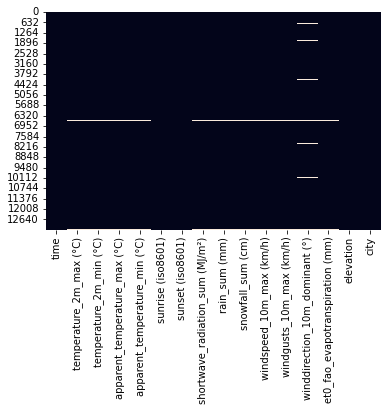

In [8]:
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

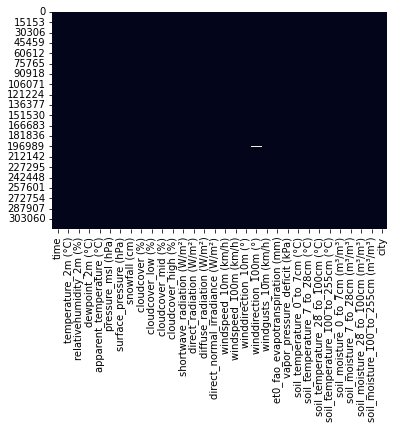

In [9]:
sns.heatmap(train_h_data.isnull(), cbar=False)

In [10]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

train_h_grouped_data = train_h_data.copy()

train_h_grouped_data["time_d"] = pd.to_datetime(train_h_grouped_data["time"]).dt.date
train_h_grouped_data["time_d"] = train_h_grouped_data["time_d"].apply(str) 

train_h_grouped_data.fillna(0)

train_h_avg_data = train_h_grouped_data.groupby('time').mean().reset_index().copy()
train_h_max_data = train_h_grouped_data.groupby('time').max().reset_index().copy()
train_h_min_data = train_h_grouped_data.groupby('time').min().reset_index().copy()

In [11]:
sums = 0
for i in train_h_grouped_data['time_d'].value_counts(): 
    if i >= 240:
        sums += 1 

sums

1315

In [12]:
train_h_grouped_data['time_d'].unique()

array(['2018-01-01', '2018-01-02', '2018-01-03', ..., '2022-06-30',
       '2021-08-02', '2022-04-23'], dtype=object)

Good data : 

In [13]:
1418-1315

103

In [14]:
for i in train_data['time']:
    if i not in list(train_h_grouped_data['time_d'].unique()):
        print(i)

Train Data Total: 13258

Train Hourly Data Total: 318192

<AxesSubplot:>

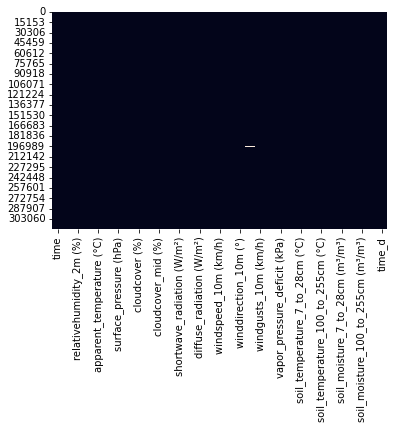

In [15]:
sns.heatmap(train_h_grouped_data.isnull(), cbar=False)

# Model